# 🗞️ BBC News Classification

###  🕊️ Challenge Overview

#### 📝 Description

Text documents are one of the richest sources of data for businesses.

In this competition, we will use a **public dataset from the BBC** consisting of **2,225 news articles**, each labeled with one of the following five categories:

- 🏢 business
- 🎬 entertainment
- 🏛 politics
- 🏅 sport
- 💻 tech


#### 📚 Dataset Overview

The dataset is split as follows:

- **1,490 articles** for training
- **735 articles** for testing

#### 🎯 Objective

Build a model that accurately classifies previously unseen articles into one of the five categories.

#### 🔗 Helpful Resource

A helpful resource for understanding the problem:
[Google Cloud Blog - Problem-Solving with ML: Automatic Document Classification](https://cloud.google.com/blog/products/gcp/problem-solving-with-ml-automatic-document-classification)

#### 📊 Evaluation

- **Metric**: Accuracy
- 🧾 **Submission Format**:
  - File must contain a header
  - Two required columns:
    - `ArticleId` (from test file)
    - `Category` (one of: sport, tech, business, entertainment, politics)

#### 💡 Tips

Ensure your output matches the required structure for successful evaluation.

## 🖥️ Initialization

In [2]:
# mount `MyDrive`
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/notebooks/dtsa-5510/week_4_programming_assignment/

Mounted at /content/drive
/content/drive/MyDrive/notebooks/dtsa-5510/week_4_programming_assignment


In [3]:
from google.colab import userdata
import os
import json
# Get the API key from the Secrets Manager
kaggle_api_key = userdata.get('KAGGLE_API_KEY')

# Create the .kaggle directory and the kaggle.json file
!mkdir -p ~/.kaggle
!echo "$kaggle_api_key" > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls -l ~/.kaggle

# Assuming both secrets are available
kaggle_username = userdata.get("KAGGLE_USERNAME")  # You need to set this too
kaggle_key = userdata.get("KAGGLE_API_KEY")

# Double-check both are present
assert kaggle_username is not None, "Missing KAGGLE_USERNAME"
assert kaggle_key is not None, "Missing KAGGLE_API_KEY"

# Write the kaggle.json file
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump({"username": kaggle_username, "key": kaggle_key}, f)

os.chmod("/root/.kaggle/kaggle.json", 0o600)


# Write kaggle.json
kaggle_config = {
    "username": kaggle_username,
    "key": kaggle_key
}

total 4
-rw------- 1 root root 33 Jun 23 14:21 kaggle.json


### 🥣 Load Data from Kaggle

In [4]:
# # Copy the kaggle files
# !kaggle competitions download -c learn-ai-bbc -p /content || echo "Failed"
# # Move the files
# !mv /content/learn-ai-bbc.zip /content/drive/MyDrive/notebooks/dtsa-5510/week_4_programming_assignment/data/
# %cd /content/drive/MyDrive/notebooks/dtsa-5510/week_4_programming_assignment/data/
# !ls -l /content/drive/MyDrive/notebooks/dtsa-5510/week_4_programming_assignment/data/
#  # Extract the files
# !unzip /content/drive/MyDrive/notebooks/dtsa-5510/week_4_programming_assignment/data/learn-ai-bbc.zip -d ./data

### 🗽 Bring in the Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# c'est magique
%matplotlib inline

## 📁 Load and Inspect the Data

In [6]:
data = pd.read_csv('./data/BBC News Train.csv')
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [7]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


## 🧼 Clean the Data

In [8]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Normalize column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Rename `ArticleID` to `article_id`
data = data.rename(columns={'articleid': 'article_id'})

# Normalize rows and filter out unnecessary words
def clean_text(text):
  # Lowercase
  text = text.lower()
  # Remove punctuation and digits
  text = re.sub(r'[^a-z\s]', '', text)
  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()
  # Optionally remove stopwords (if needed)
  return text

def remove_stopwords(text):
  return ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])

data['text'] = data['text'].apply(clean_text)

data['text'] = data['text'].apply(remove_stopwords)

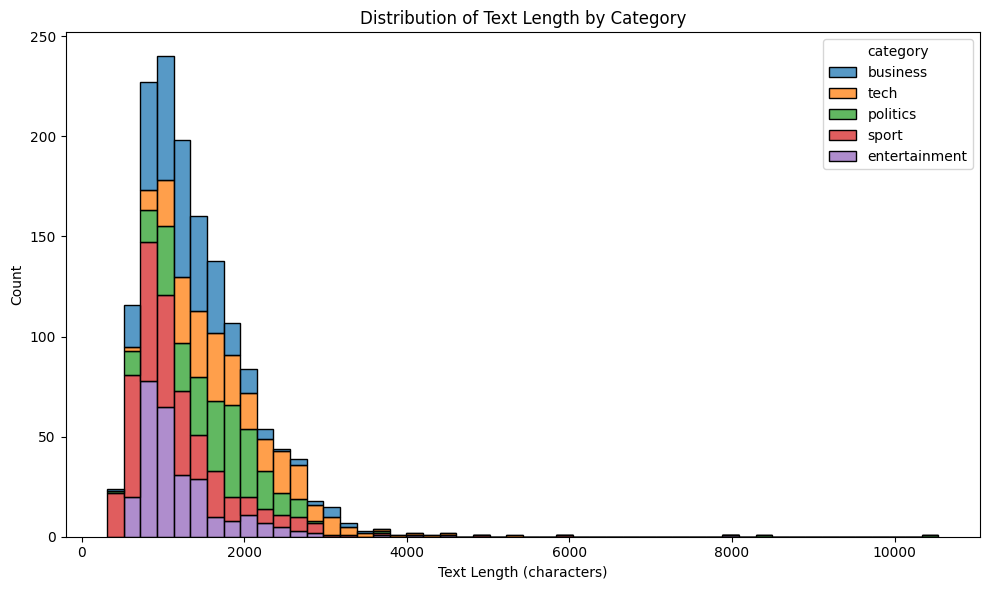

In [12]:
# Show class distribution
data['category'].value_counts()

# Are there any longbois?
data['text_length'] = data['text'].str.len()

# Plot distribution of text length per category
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='text_length', hue='category', multiple='stack', bins=50, kde=False)
plt.title("Distribution of Text Length by Category")
plt.xlabel("Text Length (characters)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


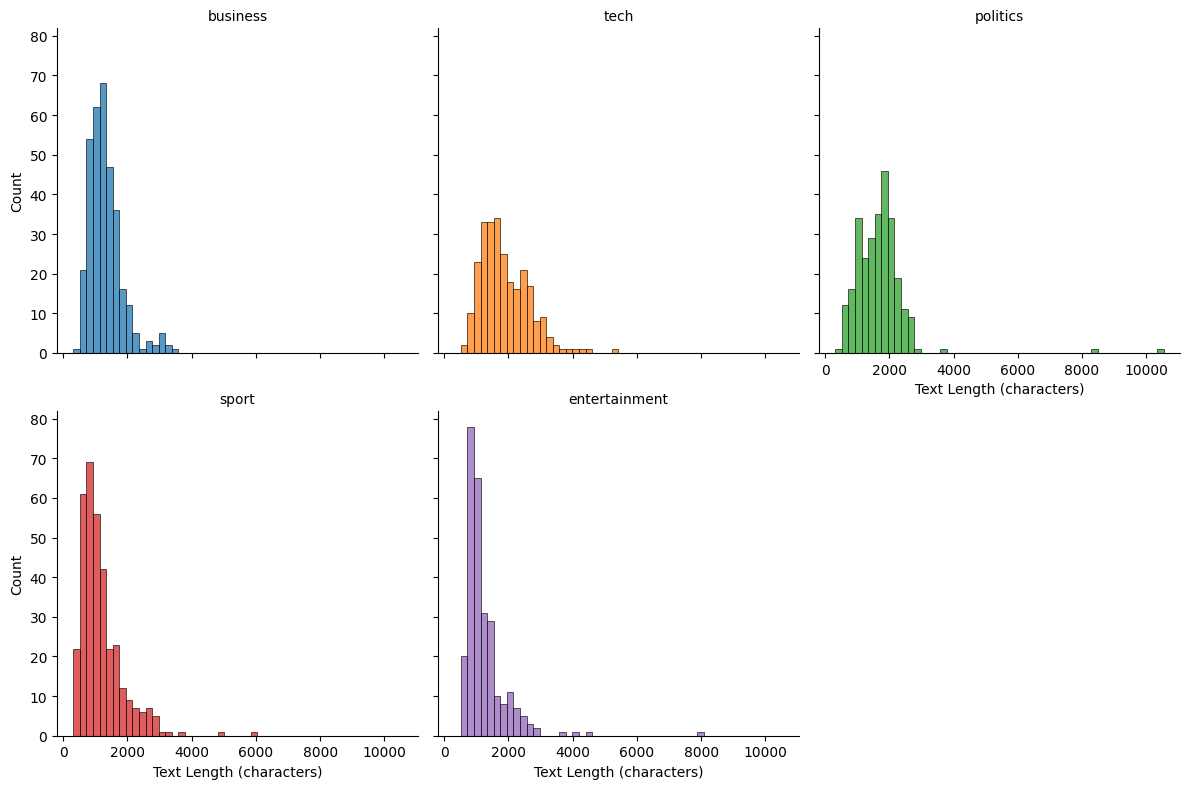

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate text length if not already done
data['text_length'] = data['text'].str.len()

# Define consistent color palette
palette = {
    "business": "#1f77b4",
    "tech": "#ff7f0e",
    "politics": "#2ca02c",
    "sport": "#d62728",
    "entertainment": "#9467bd"
}

# Fix the bar widths
min_len = data['text_length'].min()
max_len = data['text_length'].max()
bins = np.linspace(min_len, max_len, 51)  # 50 equal-width bins

# Create FacetGrid with shared bins
g = sns.FacetGrid(data, col="category", col_wrap=3, height=4, sharex=True, sharey=True,
                  palette=palette, hue="category")
g.map(sns.histplot, "text_length", bins=bins, kde=False, color=None)

g.set_titles("{col_name}")
g.set_axis_labels("Text Length (characters)", "Count")
plt.tight_layout()
plt.show()

### 🦖 Apply TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and fit TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    max_features=1000, # Keep it small
    stop_words='english',
    lowercase=True
    )
X_tfidf = vectorizer.fit_transform(data['text'])

# Optional: Convert sparse matrix to dense DataFrame for exploration
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out()
    )

# Optional: Attach labels for downstream use
tfidf_df['category'] = data['category']

### 💢 PCA

In [24]:
from sklearn.decomposition import PCA

X_dense = X_tfidf.toarray()
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_dense)

# I like pretty colours too, but R^612 is kind of hard to graph...
# ValueError: Shape of passed values is (1490, 612), indices imply (1490, 2)
# pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
# pca_df['category'] = data['category'].values

# # Plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="category", palette=palette)
# plt.title("TF-IDF Text Data Reduced with PCA")
# plt.tight_layout()
# plt.show()

## 🧠 Matrix Factorization Model

In [25]:
from sklearn.decomposition import NMF

nmf = NMF(
    n_components=5,
    random_state=42069 # Nice
    )

# Fit the model
W = nmf.fit_transform(X_tfidf)  # Document-topic matrix # shape: (n_samples, 5)
H = nmf.components_             # Topic-word matrix

# Top Words per Category
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(H):
    top_features = [feature_names[i] for i in topic.argsort()[-10:][::-1]]
    print(f"Topic {topic_idx + 1}: {', '.join(top_features)}")

Topic 1: mr, labour, blair, election, said, party, brown, government, minister, prime
Topic 2: game, england, win, said, cup, wales, ireland, players, play, match
Topic 3: bn, said, growth, market, year, firm, economy, company, shares, sales
Topic 4: film, best, awards, award, actor, actress, films, director, festival, won
Topic 5: people, mobile, said, music, technology, phone, software, users, digital, microsoft


### 🧜‍♂️ Train the Classifier

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(W, data['category'], test_size=0.2, random_state=42)

# Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.92      0.95      0.93        75
entertainment       0.95      0.83      0.88        46
     politics       0.89      0.89      0.89        56
        sport       0.93      1.00      0.96        63
         tech       0.89      0.88      0.89        58

     accuracy                           0.92       298
    macro avg       0.92      0.91      0.91       298
 weighted avg       0.92      0.92      0.92       298



### 🧂 Confusion Matrix

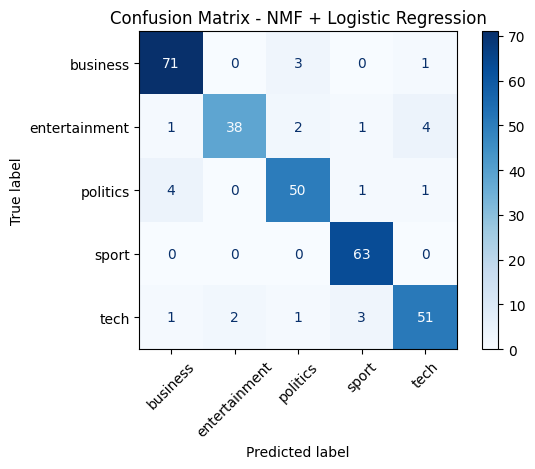

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix - NMF + Logistic Regression")
plt.tight_layout()
plt.show()

- Justify if the test set should be included in matrix factorization
- Apply matrix factorization (e.g., NMF from `sklearn`)
- Train model on training set
- Evaluate performance: accuracy, confusion matrix
- Submit to Kaggle (save predictions as CSV)
- Experiment with hyperparameters

### 🏇 Apply Matrix Factorization using NMF from `sklearn`